## Details :

Name : Sumit Shamlal Chaure

Batch : 10

Program : Data Science with Python By SkillAcademy

Assignment : Machine Learning Major Assignment

Topics : ML, Model Building, Test & Training

> File Downloads :

 - [Assignment PDF](https://drive.google.com/file/d/1MahtGzQJPhkiBuG1B6Jk-T6FN3t6-BfZ/view?usp=drive_link)

 - [CSV Dataset](https://drive.google.com/file/d/127aE6eIn8ogbg4hhIYczCEwSVMiX5YcS/view?usp=drive_link)

 - [Dataset Alternate Link](https://gist.github.com/Sumit-SC/d92ba3ac5035548bb23a147f151ce1d5)

- [Import file from your local drive](#-importing-the-csv-file-to-work-on)

> My Reports & Files :

- [Drive Folder](https://drive.google.com/drive/folders/1QtCGg3r85vVv97Vs23WMKDAb8qN2Omcw)

- [Report Pdf](https://drive.google.com/file/d/1Z8FrP5efLDXjy00Bexx5ktEP6t5YMIfh/view?usp=drive_link)

- [Report Word](https://docs.google.com/document/d/1wCWcPDKNglPb1UEcIfln2zBVwLE7pgwV17OpBzv3OBo/edit?usp=drive_link)

*Note :* Certain markdown linkings like page links wont work on google colab/Jupyter but the same on github or vs-code would take you to respective breakpoints as they have advanced markdown support for inline tagging and MD linkings.

<details>
<summary>Steps Involved in Machine Learning Projects</summary>

1. Understanding the Problem Statement.

2. Data Collection (From Sources/API/Files).

3. Data Checking for analysis.

4. Exploratory Data Analysis (To get insights of dataset & problem)

5. Data Pre-Processing.

6. Model Selection & evaluation.

7. Model Training.

8. Choosing the Best Model for Best results.

9.  Testing with new data & checking the factors such as recall, accuracy & precision.

10. Model Deployment

11. User testing & benchmarking etc.

12. Reiterating the steps with new data and building more accurate models.

</details>

# Major Assignment (Machine Learning)

### 1. Understanding the Problem & Dataset

Use the Oil Spill Dataset and solve the following question by using the
dataset.

<details>
<summary>About Dataset</summary>

The dataset was developed by starting with satellite images of the ocean,
some of which contain an oil spill and some that do not.

Images were split into sections and processed using computer vision
algorithms to provide a vector of features to describe the contents of the
image section or patch.

The task is, given a vector that describes the contents of a patch of a satellite
image, then predicts whether the patch contains an oil spill or not, e.g. from
the illegal or accidental dumping of oil in the ocean.

There are two classes and the goal is to distinguish between spill and
non-spill using the features of a given ocean patch.

● <b>Non-Spill</b>: negative case, or majority class.

● <b>Oil Spill</b>: positive case, or minority class.

There are a total of **50 Columns** in the Dataset, the *output column* is named
as a **target**.
</details>

<details>
<summary>
Questions
</summary>

1. Download the Oil Spill Dataset and perform Data cleaning and Data Pre-Processing if Necessary.


2. Use various methods such as Handling null values, One-Hot Encoding, Imputation, and Scaling of Data Pre-Processing where necessary.

3. Derive some insights from the dataset.

4. Apply various Machine Learning techniques to predict the output in the target column, make use of Bagging and Ensemble as required, and find the best model by evaluating the model using Model evaluation techniques.

5. Save the best model and Load the model.

6. Take the original dataset and make another dataset by randomly picking 20 data points from the oil spill dataset and applying the saved model to the same.

</details>

### 2. Module Imports

In [ ]:
import pandas as pd             # for data cleaning and data pre-processing, CSV file I/O,etc
import numpy as np              # linear algebra & for mathematical computation
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns           # for visualization
from collections import Counter # to count occurrences
from tabulate import tabulate   # to make tables for results

import warnings                 # for warning removals in code output
warnings.filterwarnings('ignore')

# Scalers & Encoders
from sklearn.preprocessing import StandardScaler, LabelEncoder
#train-test split
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import (mean_squared_error, r2_score,confusion_matrix, classification_report, accuracy_score,roc_auc_score, roc_curve, auc)
# Model Libraries
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import pickle           #to save and load model files as pkl file

### Q1) Download the Oil Spill Dataset and perform Data cleaning and Data Pre-Processing if Necessary. *(Data cleaning & Processing Answer Continued in Q2)*

#### 2.1) Importing the dataset (With error handling)

In [ ]:
# 2.1) Importing the dataset (With error handling)
# If you want to upload the dataset directly (Since on Google Colab it will be lost on re-run) - uncomment the below 2 line code and run
from google.colab import files
uploaded = files.upload()

file_path = "oil_spill.csv"
file_name = file_path.split("/")[-1]

try:
    # Reading the CSV file into a Pandas DataFrame
    df = pd.read_csv(file_path)
    # Store the filename as an attribute in the DataFrame
    df.file_name = file_name
    print(f"\n '{df.file_name}' loaded successfully.")

# Exception to check if the file has some error like no file at the path, etc.
except FileNotFoundError:
    print(f"Error: '{file_name}' not found at the specified location {file_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Saving oil_spill.csv to oil_spill.csv

 'oil_spill.csv' loaded successfully.


In [ ]:
df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


**Insights:** As the assignment is part of major submission i tried to add few exception handling steps to verify things like file not found error. (If we try to import any empty csv in the dataframe it will prompt an exception suggesting no file found at the specified location.)

  > - I have added an extra commented code for google colab imports directly to upload the csv file from local drive and then start the further process.
  > - To use on google colab uncomment the start line of code to import the file on google colab drive instance.
  > - I have not added extraneous code to get the filename from uploaded files and save them directly instead hardcoded/kept it so that even if code is run offline it will work perfectly fine.

*Note*: As Q.2 needs to do data pre-processing i have added the data cleaning steps in that section directly.

---
### Q2) Use various methods such as Handling null values, One-Hot Encoding,Imputation, and Scaling of Data Pre-Processing where necessary. (Q1 Continued below)

##### 2.2) Showing Basic Dataset Information

In [ ]:
# Check the shape of the DataFrame
print("\nShape of the DataFrame:")
print(df.shape)
print(df.size)
num_rows, num_columns = df.shape
print(f"Rows: {num_rows}, Columns: {num_columns}")

# Display information about the dataset
print(f"\nDataset information for {df.file_name}:")
df.head(3)
df.tail(3)
print("\nDataset information:")
print(df.info())


Shape of the DataFrame:
(937, 50)
46850
Rows: 937, Columns: 50

Dataset information for oil_spill.csv:

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    

##### Columns of the dataset

In [ ]:
# Display the columns & rows of dataset
print(f"The columns of our {file_name} dataframe\n")
print(df.columns)

The columns of our oil_spill.csv dataframe

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')


##### 3) Data Checks to Perform

- Check Missing Values.
- Check Duplicates
- Check Data Type
- Check Unique Values
- Check Data Statistics
- Check Categorical Columns & Data

##### Missing Values/Null Check

In [ ]:
print("Missing values in the dataset:\n")
print(df.isnull().sum())
# NA value calculation
nullval = df.isna().sum()
nullval = nullval[nullval > 0]
print("\nSum of Missing values:\n", nullval)

Missing values in the dataset:

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

Sum of Missing values:
 Series([], dtype: int64)


No Null values or NA are present in our dataset.

##### Duplicate Values Check

In [ ]:
print("\nChecking for duplicated values:\n")
print(df.duplicated())
print("\nSum of Duplicated Values in Dataframe :", df.duplicated().sum())


Checking for duplicated values:

0      False
1      False
2      False
3      False
4      False
       ...  
932    False
933    False
934    False
935    False
936    False
Length: 937, dtype: bool

Sum of Duplicated Values in Dataframe : 0


The sum of duplicated value comes to be zero indicating that no duplicates are present in the dataset.

In [ ]:
# Calculating the number of missing values or null values in df
total_missing_values = df.isnull().sum().sum()
print("The number of missing values/NA in dataframe :", total_missing_values)

# Calculate the total number of values in df (excluding the missing values)
total_values = df.size
print("Total number of values in dataframe :", total_values)

# percentage of missing values or null values in df
percentage_missing_values = (total_missing_values / total_values) * 100
print("Percentage of missing values or null values in df :",
      percentage_missing_values)

The number of missing values/NA in dataframe : 0
Total number of values in dataframe : 46850
Percentage of missing values or null values in df : 0.0


No Missing values are present in the dataset.

##### Check Value Counts

In [ ]:
print("Value counts of the dataset by datatypes")
df.dtypes.value_counts()

Value counts of the dataset by datatypes


float64    39
int64      11
dtype: int64

##### Unique Values Check

In [ ]:
print("Unique Value counts inside each columns")
df.nunique()

Unique Value counts inside each columns


f_1       238
f_2       297
f_3       927
f_4       933
f_5       179
f_6       375
f_7       820
f_8       618
f_9       561
f_10       57
f_11      577
f_12       59
f_13       73
f_14      107
f_15       53
f_16       91
f_17      893
f_18      810
f_19      170
f_20       53
f_21       68
f_22        9
f_23        1
f_24       92
f_25        9
f_26        8
f_27        9
f_28      308
f_29      447
f_30      392
f_31      107
f_32       42
f_33        4
f_34       45
f_35      141
f_36      110
f_37        3
f_38      758
f_39        9
f_40        9
f_41      388
f_42      220
f_43      644
f_44      649
f_45      499
f_46        2
f_47      937
f_48      169
f_49      286
target      2
dtype: int64

From the above unique value check many things can be observed which we will need to dive deep in further analysis.
- The target column is the one which we need to operate on for our operations.

##### Datatype Check

In [ ]:
# Check data types of each column
print("Data types of each column:")
df.dtypes

Data types of each column:


f_1         int64
f_2         int64
f_3       float64
f_4       float64
f_5         int64
f_6         int64
f_7       float64
f_8       float64
f_9       float64
f_10      float64
f_11      float64
f_12      float64
f_13      float64
f_14      float64
f_15      float64
f_16      float64
f_17      float64
f_18      float64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23        int64
f_24      float64
f_25      float64
f_26      float64
f_27      float64
f_28      float64
f_29      float64
f_30      float64
f_31      float64
f_32      float64
f_33      float64
f_34      float64
f_35        int64
f_36        int64
f_37      float64
f_38      float64
f_39        int64
f_40        int64
f_41      float64
f_42      float64
f_43      float64
f_44      float64
f_45      float64
f_46        int64
f_47      float64
f_48      float64
f_49      float64
target      int64
dtype: object

##### Statistics Summary

In [ ]:
print("\nSummary statistics:\n")
print(df.describe())


Summary statistics:

              f_1           f_2          f_3          f_4         f_5  \
count  937.000000    937.000000   937.000000   937.000000  937.000000   
mean    81.588047    332.842049   698.707086   870.992209   84.121665   
std     64.976730   1931.938570   599.965577   522.799325   45.361771   
min      1.000000     10.000000     1.920000     1.000000    0.000000   
25%     31.000000     20.000000    85.270000   444.200000   54.000000   
50%     64.000000     65.000000   704.370000   761.280000   73.000000   
75%    124.000000    132.000000  1223.480000  1260.370000  117.000000   
max    352.000000  32389.000000  1893.080000  2724.570000  180.000000   

                f_6         f_7         f_8            f_9        f_10  ...  \
count  9.370000e+02  937.000000  937.000000     937.000000  937.000000  ...   
mean   7.696964e+05   43.242721    9.127887    3940.712914    0.221003  ...   
std    3.831151e+06   12.718404    3.588878    8167.427625    0.090316  ...   
min 

##### Categorical Column Check

In [ ]:
df.select_dtypes(include="category")
categorical_columns = df.select_dtypes(include=["object"]).columns
print("\nCategorical columns:")
print(categorical_columns)


Categorical columns:
Index([], dtype='object')


##### Checking Descriptive Statistics

In [ ]:
print(f"The descriptive Stats for the {file_name} dataset:")
df.describe()

The descriptive Stats for the oil_spill.csv dataset:


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [ ]:
print("Complete Stats of every column")
print(df.describe())

Complete Stats of every column
              f_1           f_2          f_3          f_4         f_5  \
count  937.000000    937.000000   937.000000   937.000000  937.000000   
mean    81.588047    332.842049   698.707086   870.992209   84.121665   
std     64.976730   1931.938570   599.965577   522.799325   45.361771   
min      1.000000     10.000000     1.920000     1.000000    0.000000   
25%     31.000000     20.000000    85.270000   444.200000   54.000000   
50%     64.000000     65.000000   704.370000   761.280000   73.000000   
75%    124.000000    132.000000  1223.480000  1260.370000  117.000000   
max    352.000000  32389.000000  1893.080000  2724.570000  180.000000   

                f_6         f_7         f_8            f_9        f_10  ...  \
count  9.370000e+02  937.000000  937.000000     937.000000  937.000000  ...   
mean   7.696964e+05   43.242721    9.127887    3940.712914    0.221003  ...   
std    3.831151e+06   12.718404    3.588878    8167.427625    0.090316  ..

#### Q3)Derive some insights from the dataset.

##### Class Distribution (Target column)

In [ ]:
# Basic Class summary
print("\nClass distribution:\n")
print(df["target"].value_counts())

# summarize the class distribution
target = df.values[:, -1]
counter = Counter(target)
print("\nClass Distribution Summary:\n")
for k, v in counter.items():
    per = v / len(target) * 100
    print("Class=%d, Count=%d, Percentage=%.3f%%" % (k, v, per))


Class distribution:

0    896
1     41
Name: target, dtype: int64

Class Distribution Summary:

Class=1, Count=41, Percentage=4.376%
Class=0, Count=896, Percentage=95.624%


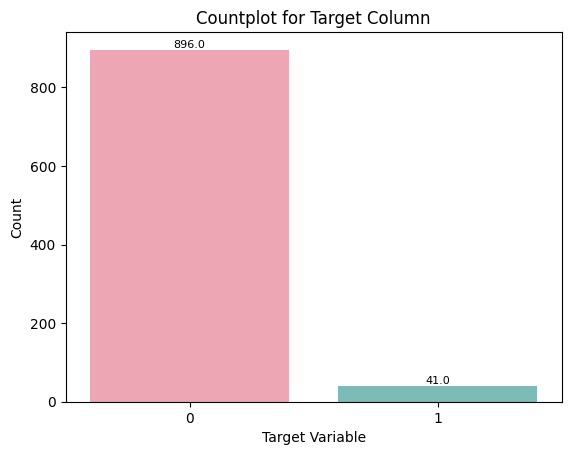

In [ ]:
# Countplot for Target Variable
ax = sns.countplot(x=df["target"], palette="husl", alpha=0.7)
plt.title("Countplot for Target Column")
plt.xlabel("Target Variable")
plt.ylabel("Count")

# Loop for annotation
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        p.get_height(),
        f"{p.get_height()}",
        ha="center",
        va="bottom",
        fontsize=8,
        color="black",
    )

plt.show()

The target column on which we need to work for our classification shows that the dataset indicates:
- 896 Non oil-spill data/regions or roughly 95.6% of dataset
- 41 Oil-spill data/regions i.e. around 4.4% of dataset.
- The above information will help us to design and test our model to check the predictions and its accuracy.
```
More info on color pallete
```
1. [GFG](https://www.geeksforgeeks.org/seaborn-color-palette/)
2. [Seaborn Color](https://seaborn.pydata.org/tutorial/color_palettes.html)

##### Histogram to see the data analysis

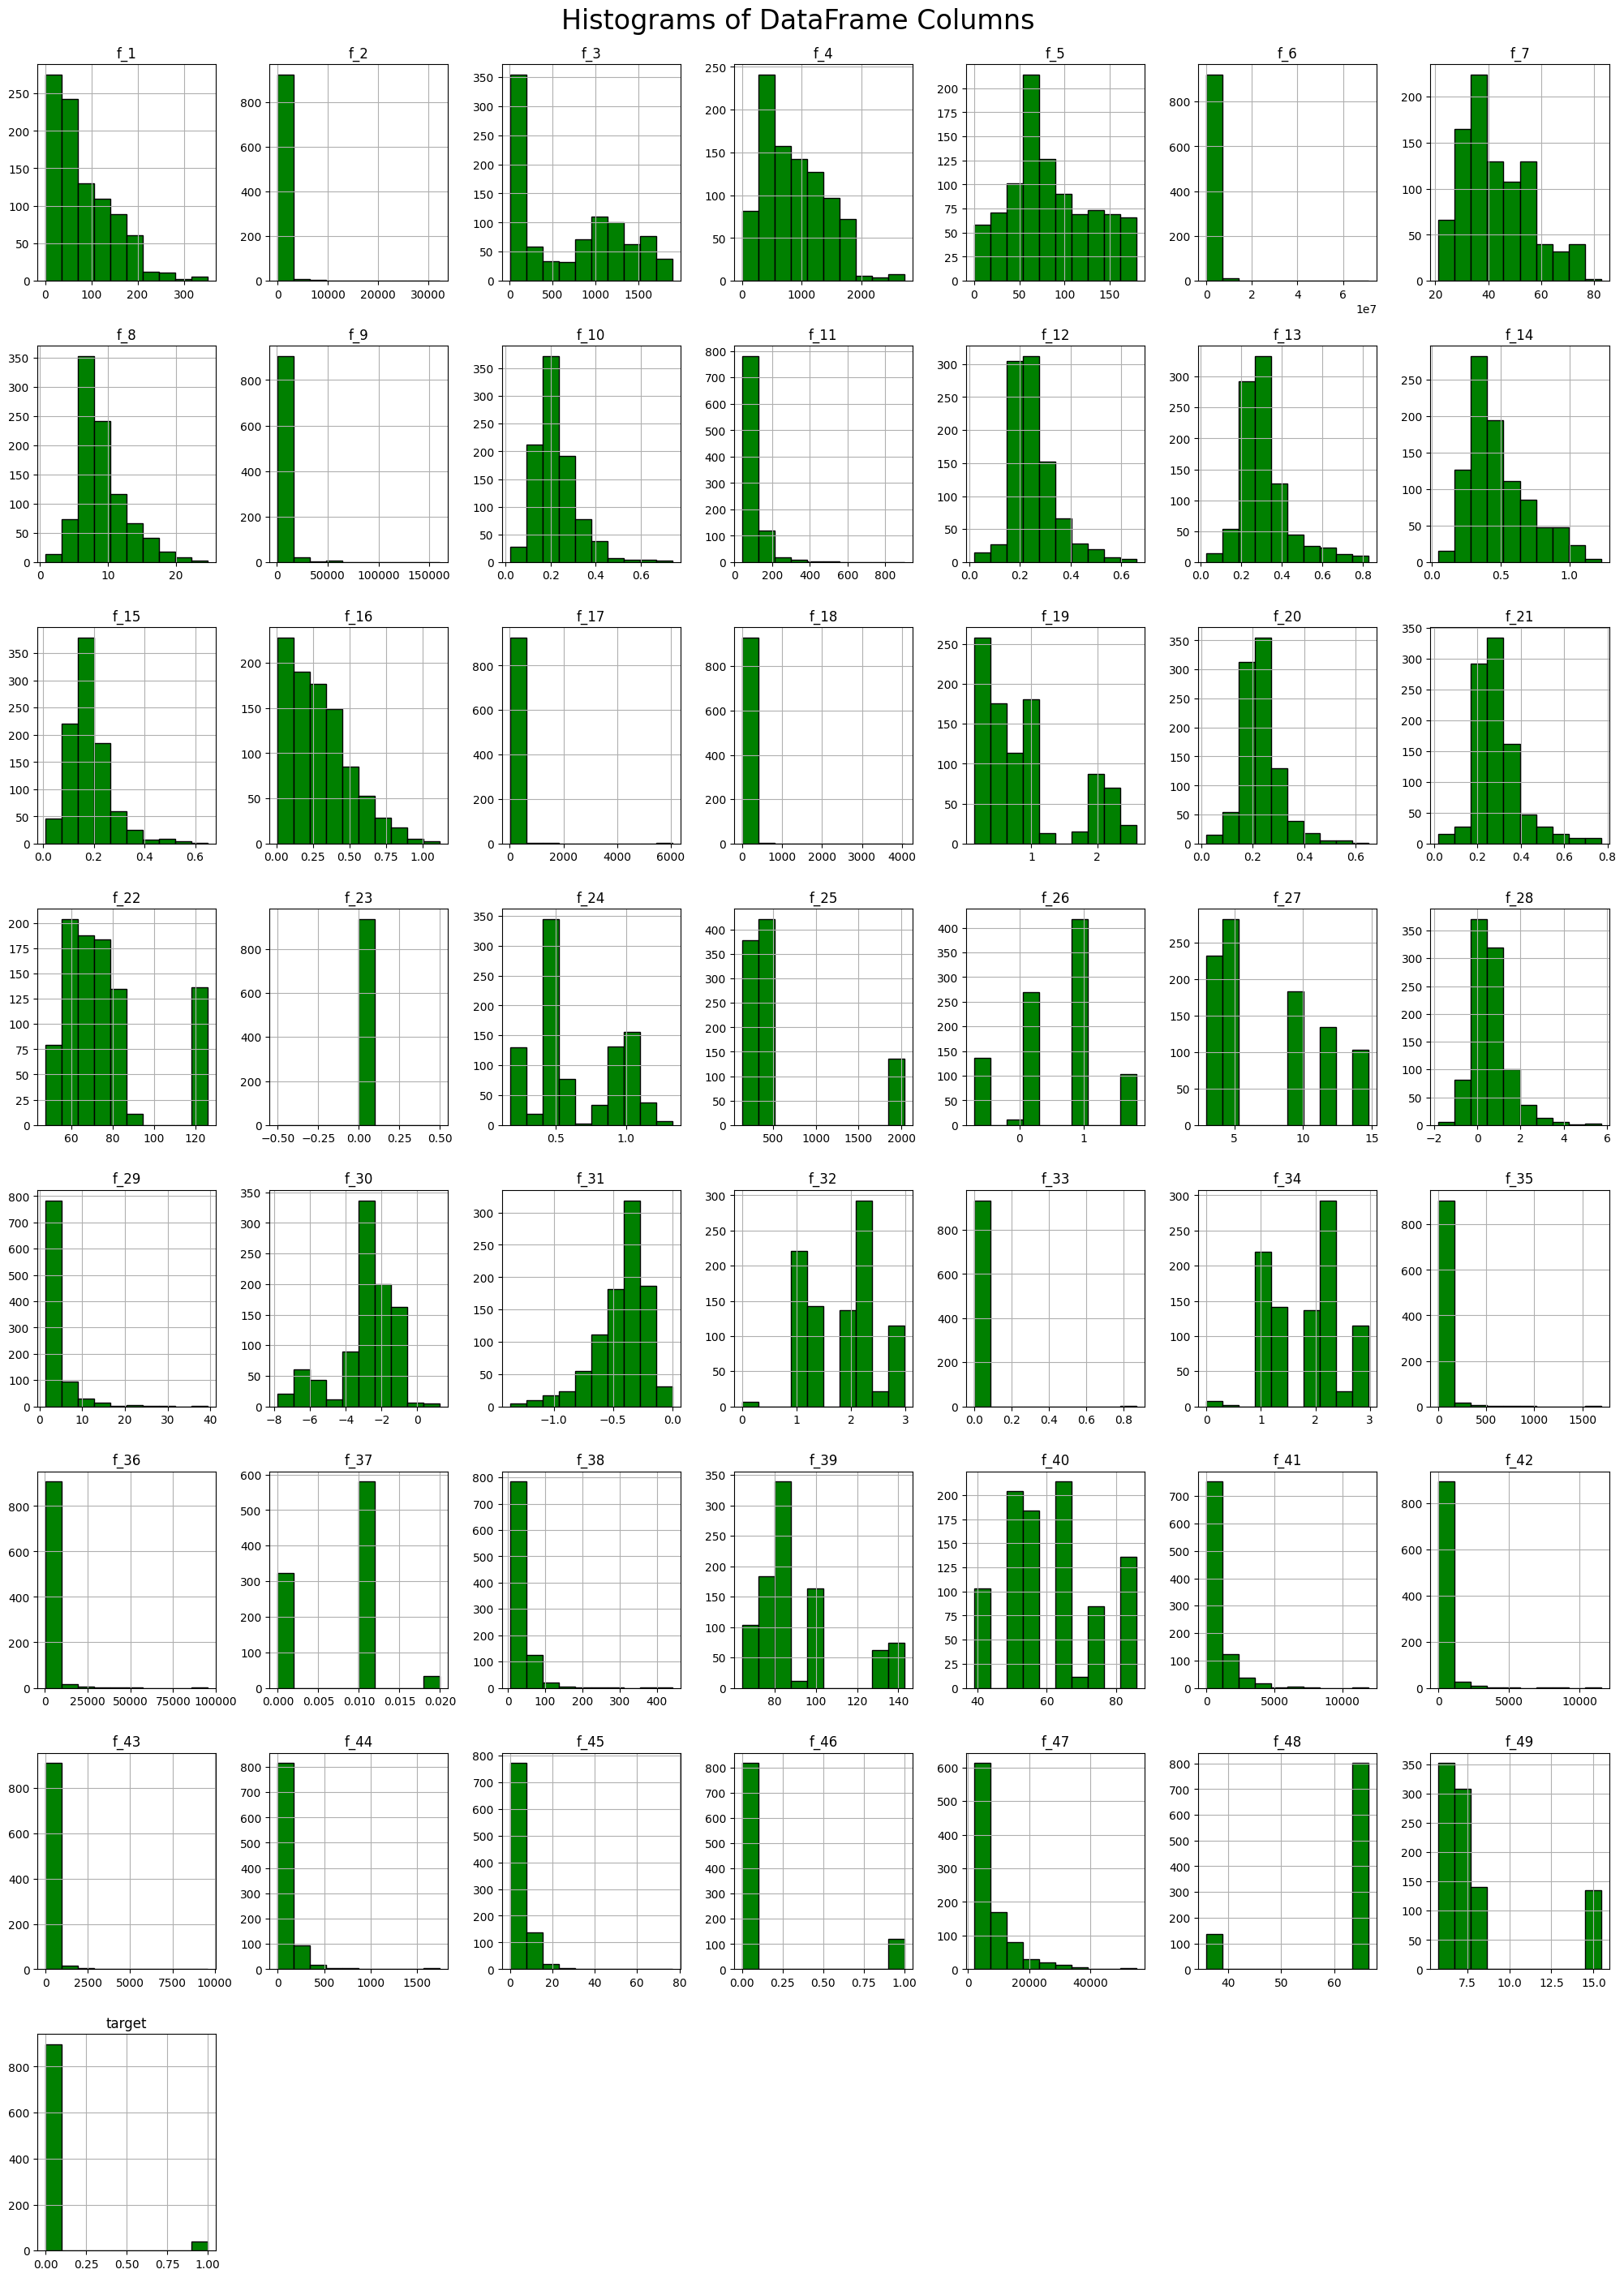

In [ ]:
fig = plt.figure(figsize=(25, 35))
ax = fig.gca()

_ = df.hist(ax=ax, color="green", edgecolor="black")
# Add a title at the top of the subplots
plt.suptitle("Histograms of DataFrame Columns", y=0.90, fontsize=24)

plt.show()

##### Simple Pie-chart to see target column distribution

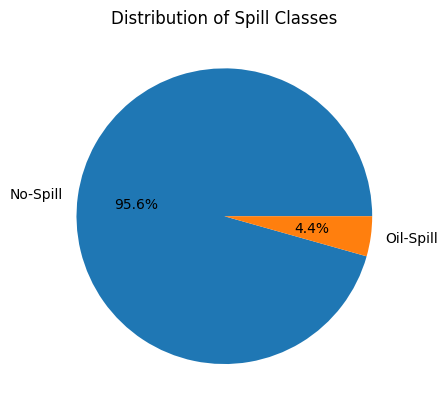

In [ ]:
piechart = df["target"].value_counts()
# Create a pie chart with labels, numbers, and percentages
plt.pie(piechart, labels=["No-Spill", "Oil-Spill"],
        autopct="%0.1f%%", radius=1)
plt.title("Distribution of Spill Classes")
plt.show()

##### Pie-chart to show the single value in column F_23

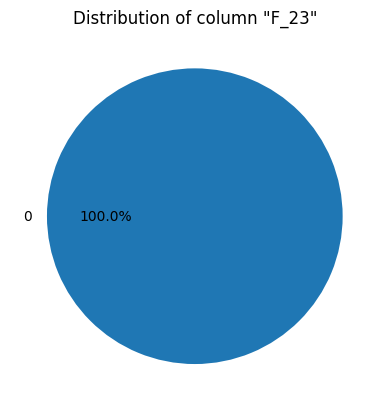

In [ ]:
f_23_distribution = df["f_23"].value_counts()
labels = f_23_distribution.index.map(str)
values = f_23_distribution.values
plt.pie(values, labels=labels, autopct="%0.1f%%", radius=1)
plt.title(f'Distribution of column "F_23"')
plt.show()

##### Boxplots for the outlier checking of dataset

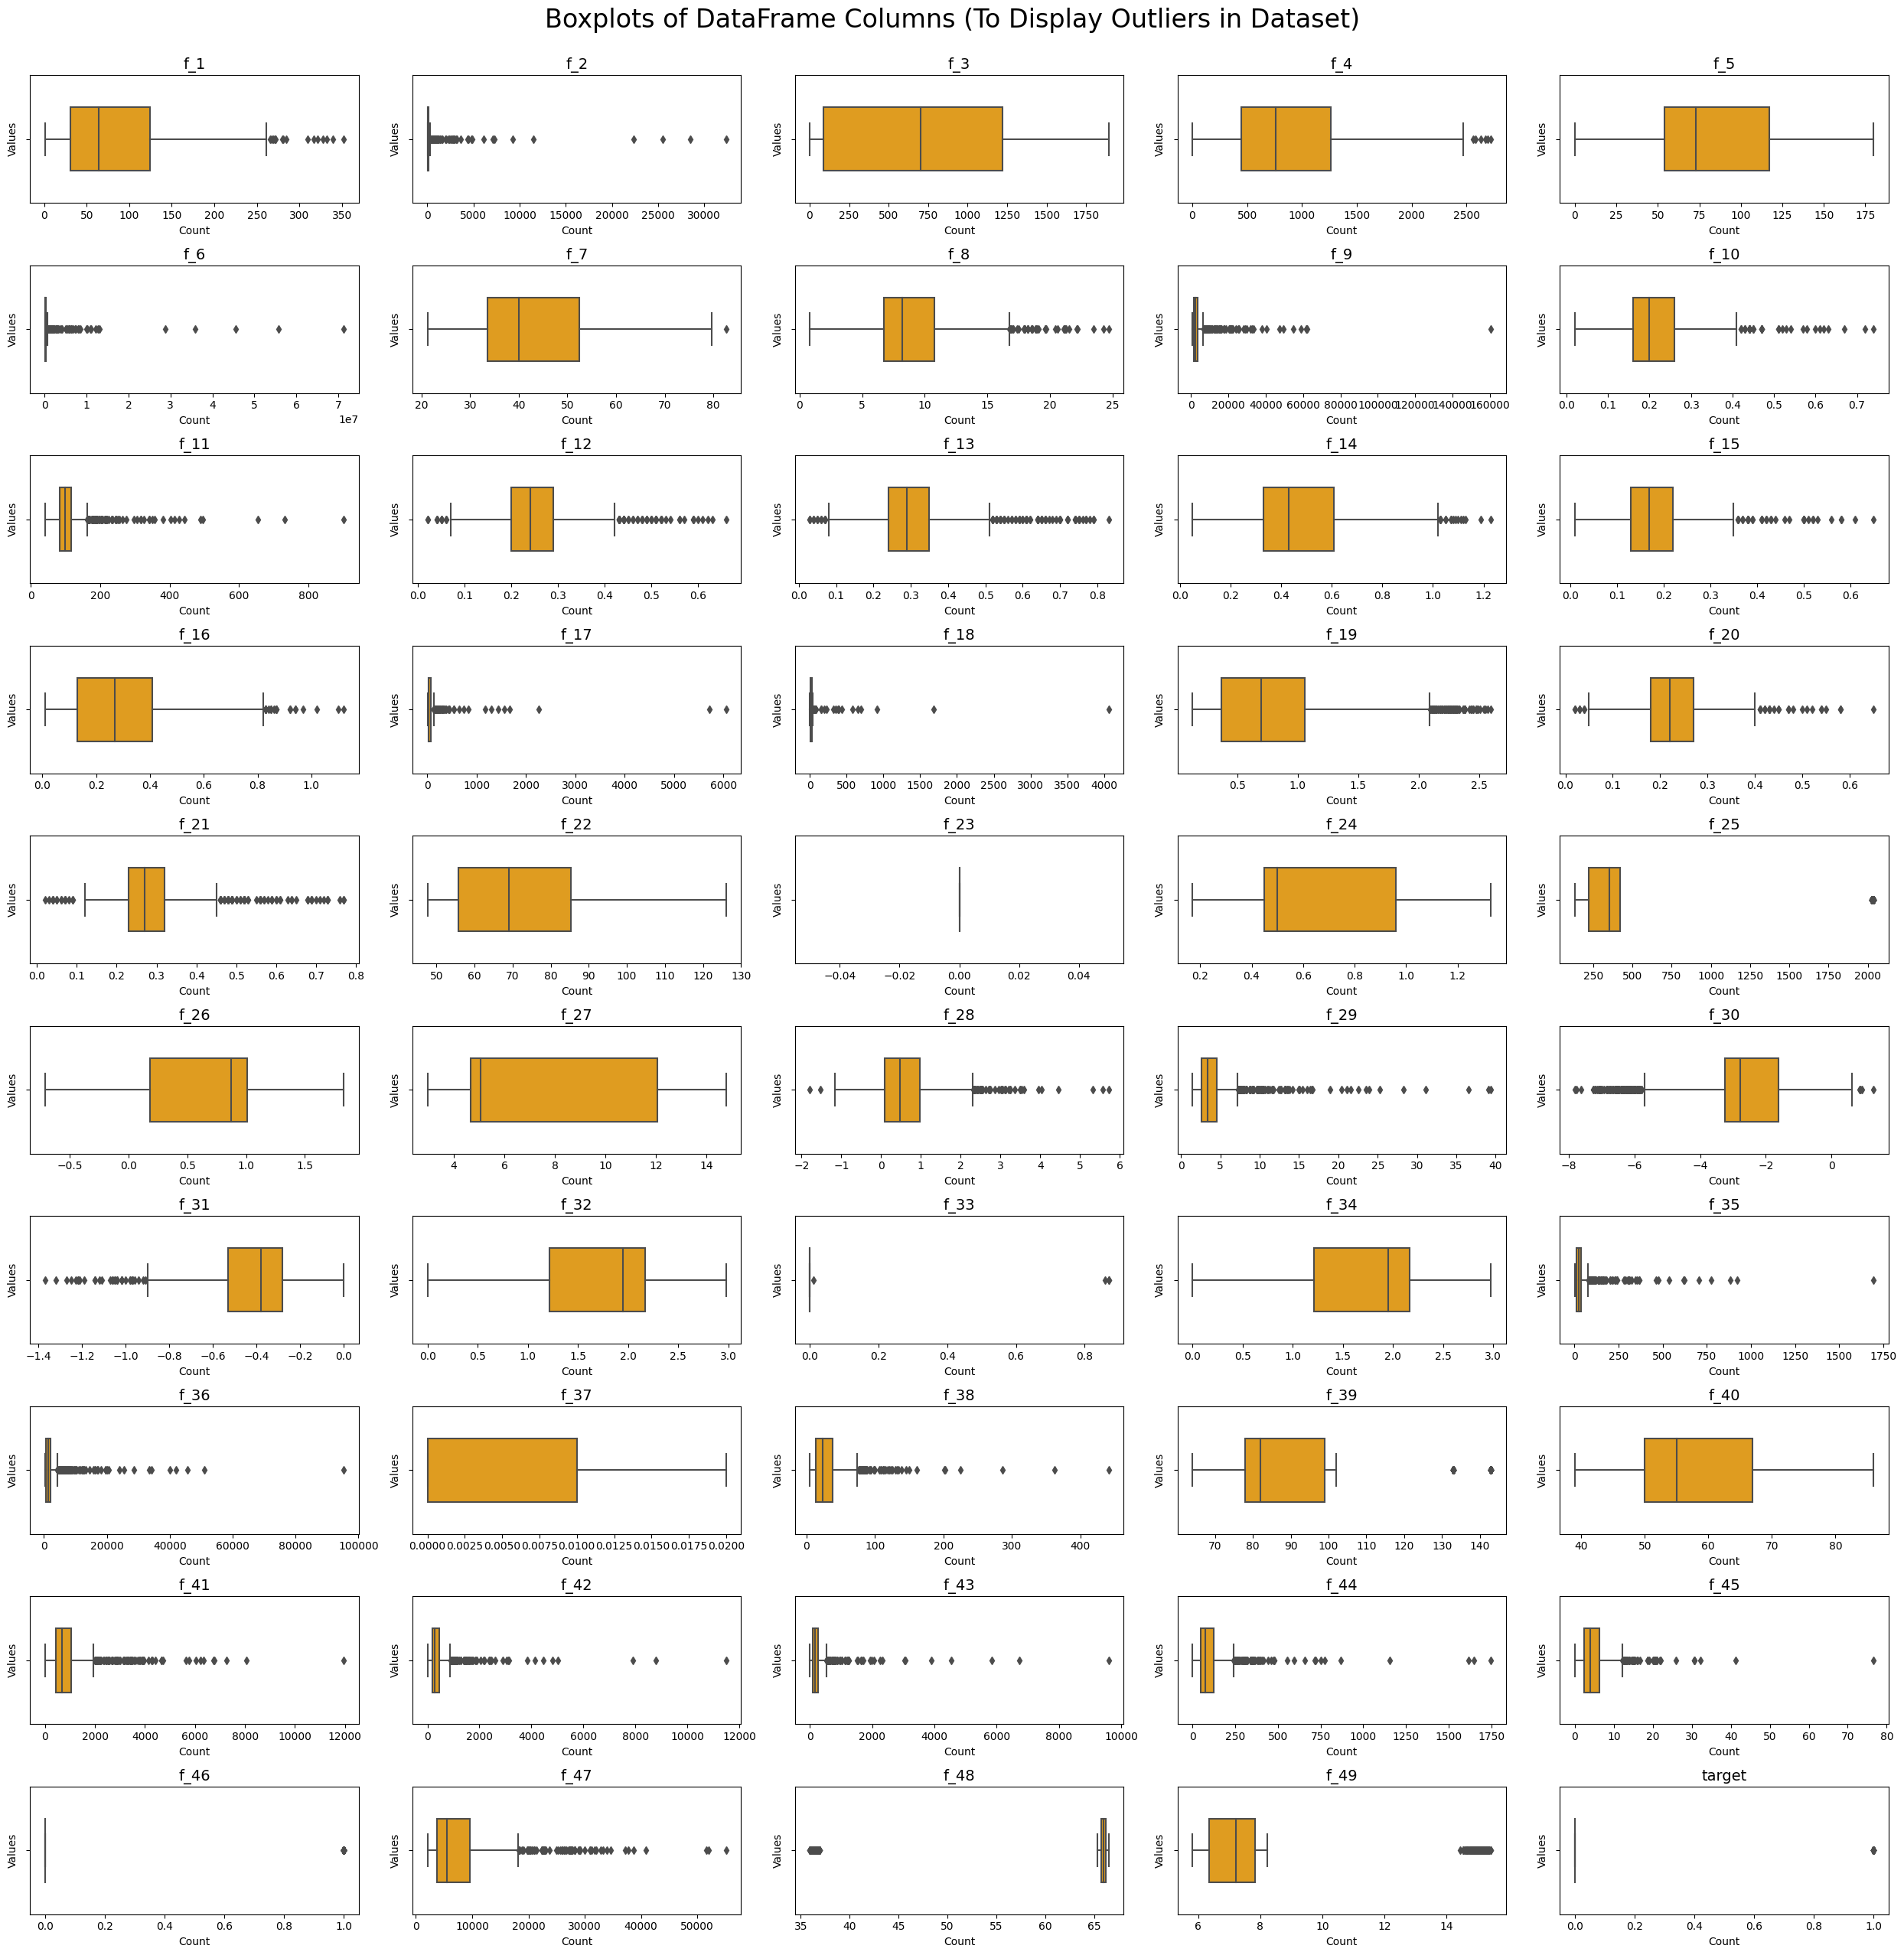

In [ ]:
# Set the number of subplots per row
subplots_per_row = 5

# Calculate the number of rows needed based on the number of columns and subplots per row
num_rows = (len(df.columns) - 1) // subplots_per_row + 1

# Set up the subplots
fig, axes = plt.subplots(
    nrows=num_rows, ncols=subplots_per_row, figsize=(25, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column and create boxplots
for ax, column in zip(axes, df.columns):
    sns.boxplot(x=df[column], ax=ax, color="orange", width=0.5)
    ax.set_title(column, fontsize=14)
    ax.set_xlabel("Count")
    ax.set_ylabel("Values")

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Add a common title at the top of the subplots
fig.suptitle(
    "Boxplots of DataFrame Columns (To Display Outliers in Dataset)",
    y=1.02,
    fontsize=24,
)

# Show the plots
plt.show()

##### Correlation matrix & Heatmap to analyze the correlation factor among various factors(columns)

In [ ]:
corr_matrix = df.corr()
df.corr()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
f_1,1.000000,-0.155581,0.172017,-0.104116,-0.017025,-0.169533,-0.037412,-0.204983,-0.244551,-0.214447,...,-0.286190,-0.167466,-0.156916,-0.141792,-0.139478,-0.163693,-0.202983,0.294422,-0.253698,-0.180531
f_2,-0.155581,1.000000,0.058390,0.052638,-0.036870,0.953947,-0.136761,-0.016822,0.829978,0.128465,...,0.555154,0.777807,0.800939,0.716496,-0.080879,-0.048315,0.118792,-0.128222,0.139417,0.034128
f_3,0.172017,0.058390,1.000000,0.549510,-0.082764,0.050795,-0.627934,-0.349541,0.158686,0.073794,...,0.186920,0.178287,0.129653,0.176883,-0.088310,-0.182458,-0.022098,0.048291,0.162600,-0.035221
f_4,-0.104116,0.052638,0.549510,1.000000,0.048847,0.024693,-0.546205,-0.222063,0.097683,0.202167,...,-0.046934,0.032402,0.022234,0.000664,-0.220461,-0.204776,0.106758,-0.394081,0.476127,-0.050489
f_5,-0.017025,-0.036870,-0.082764,0.048847,1.000000,-0.028431,0.059128,0.123814,-0.047879,0.098573,...,-0.066930,-0.014877,-0.013742,-0.012346,-0.076695,-0.080136,0.070070,-0.135294,0.116896,-0.078598
f_6,-0.169533,0.953947,0.050795,0.024693,-0.028431,1.000000,-0.093589,-0.001395,0.894150,0.097449,...,0.594273,0.844597,0.868353,0.770044,-0.077783,-0.046834,0.126850,-0.058752,0.069731,0.049318
f_7,-0.037412,-0.136761,-0.627934,-0.546205,0.059128,-0.093589,1.000000,0.381206,-0.188076,-0.380340,...,-0.115014,-0.100003,-0.074308,-0.073751,0.077207,0.088633,-0.157243,0.483034,-0.612819,-0.026183
f_8,-0.204983,-0.016822,-0.349541,-0.222063,0.123814,-0.001395,0.381206,1.000000,0.001073,0.670628,...,0.013476,-0.015712,-0.013193,0.002439,-0.061639,-0.051879,-0.028117,-0.101155,0.033731,-0.014434
f_9,-0.244551,0.829978,0.158686,0.097683,-0.047879,0.894150,-0.188076,0.001073,1.000000,0.164098,...,0.675610,0.784833,0.770129,0.736075,-0.073312,-0.048994,0.102540,-0.080203,0.113389,0.076679
f_10,-0.214447,0.128465,0.073794,0.202167,0.098573,0.097449,-0.380340,0.670628,0.164098,1.000000,...,0.082449,0.052518,0.043116,0.042269,-0.113481,-0.095896,0.112275,-0.587156,0.603358,-0.013359


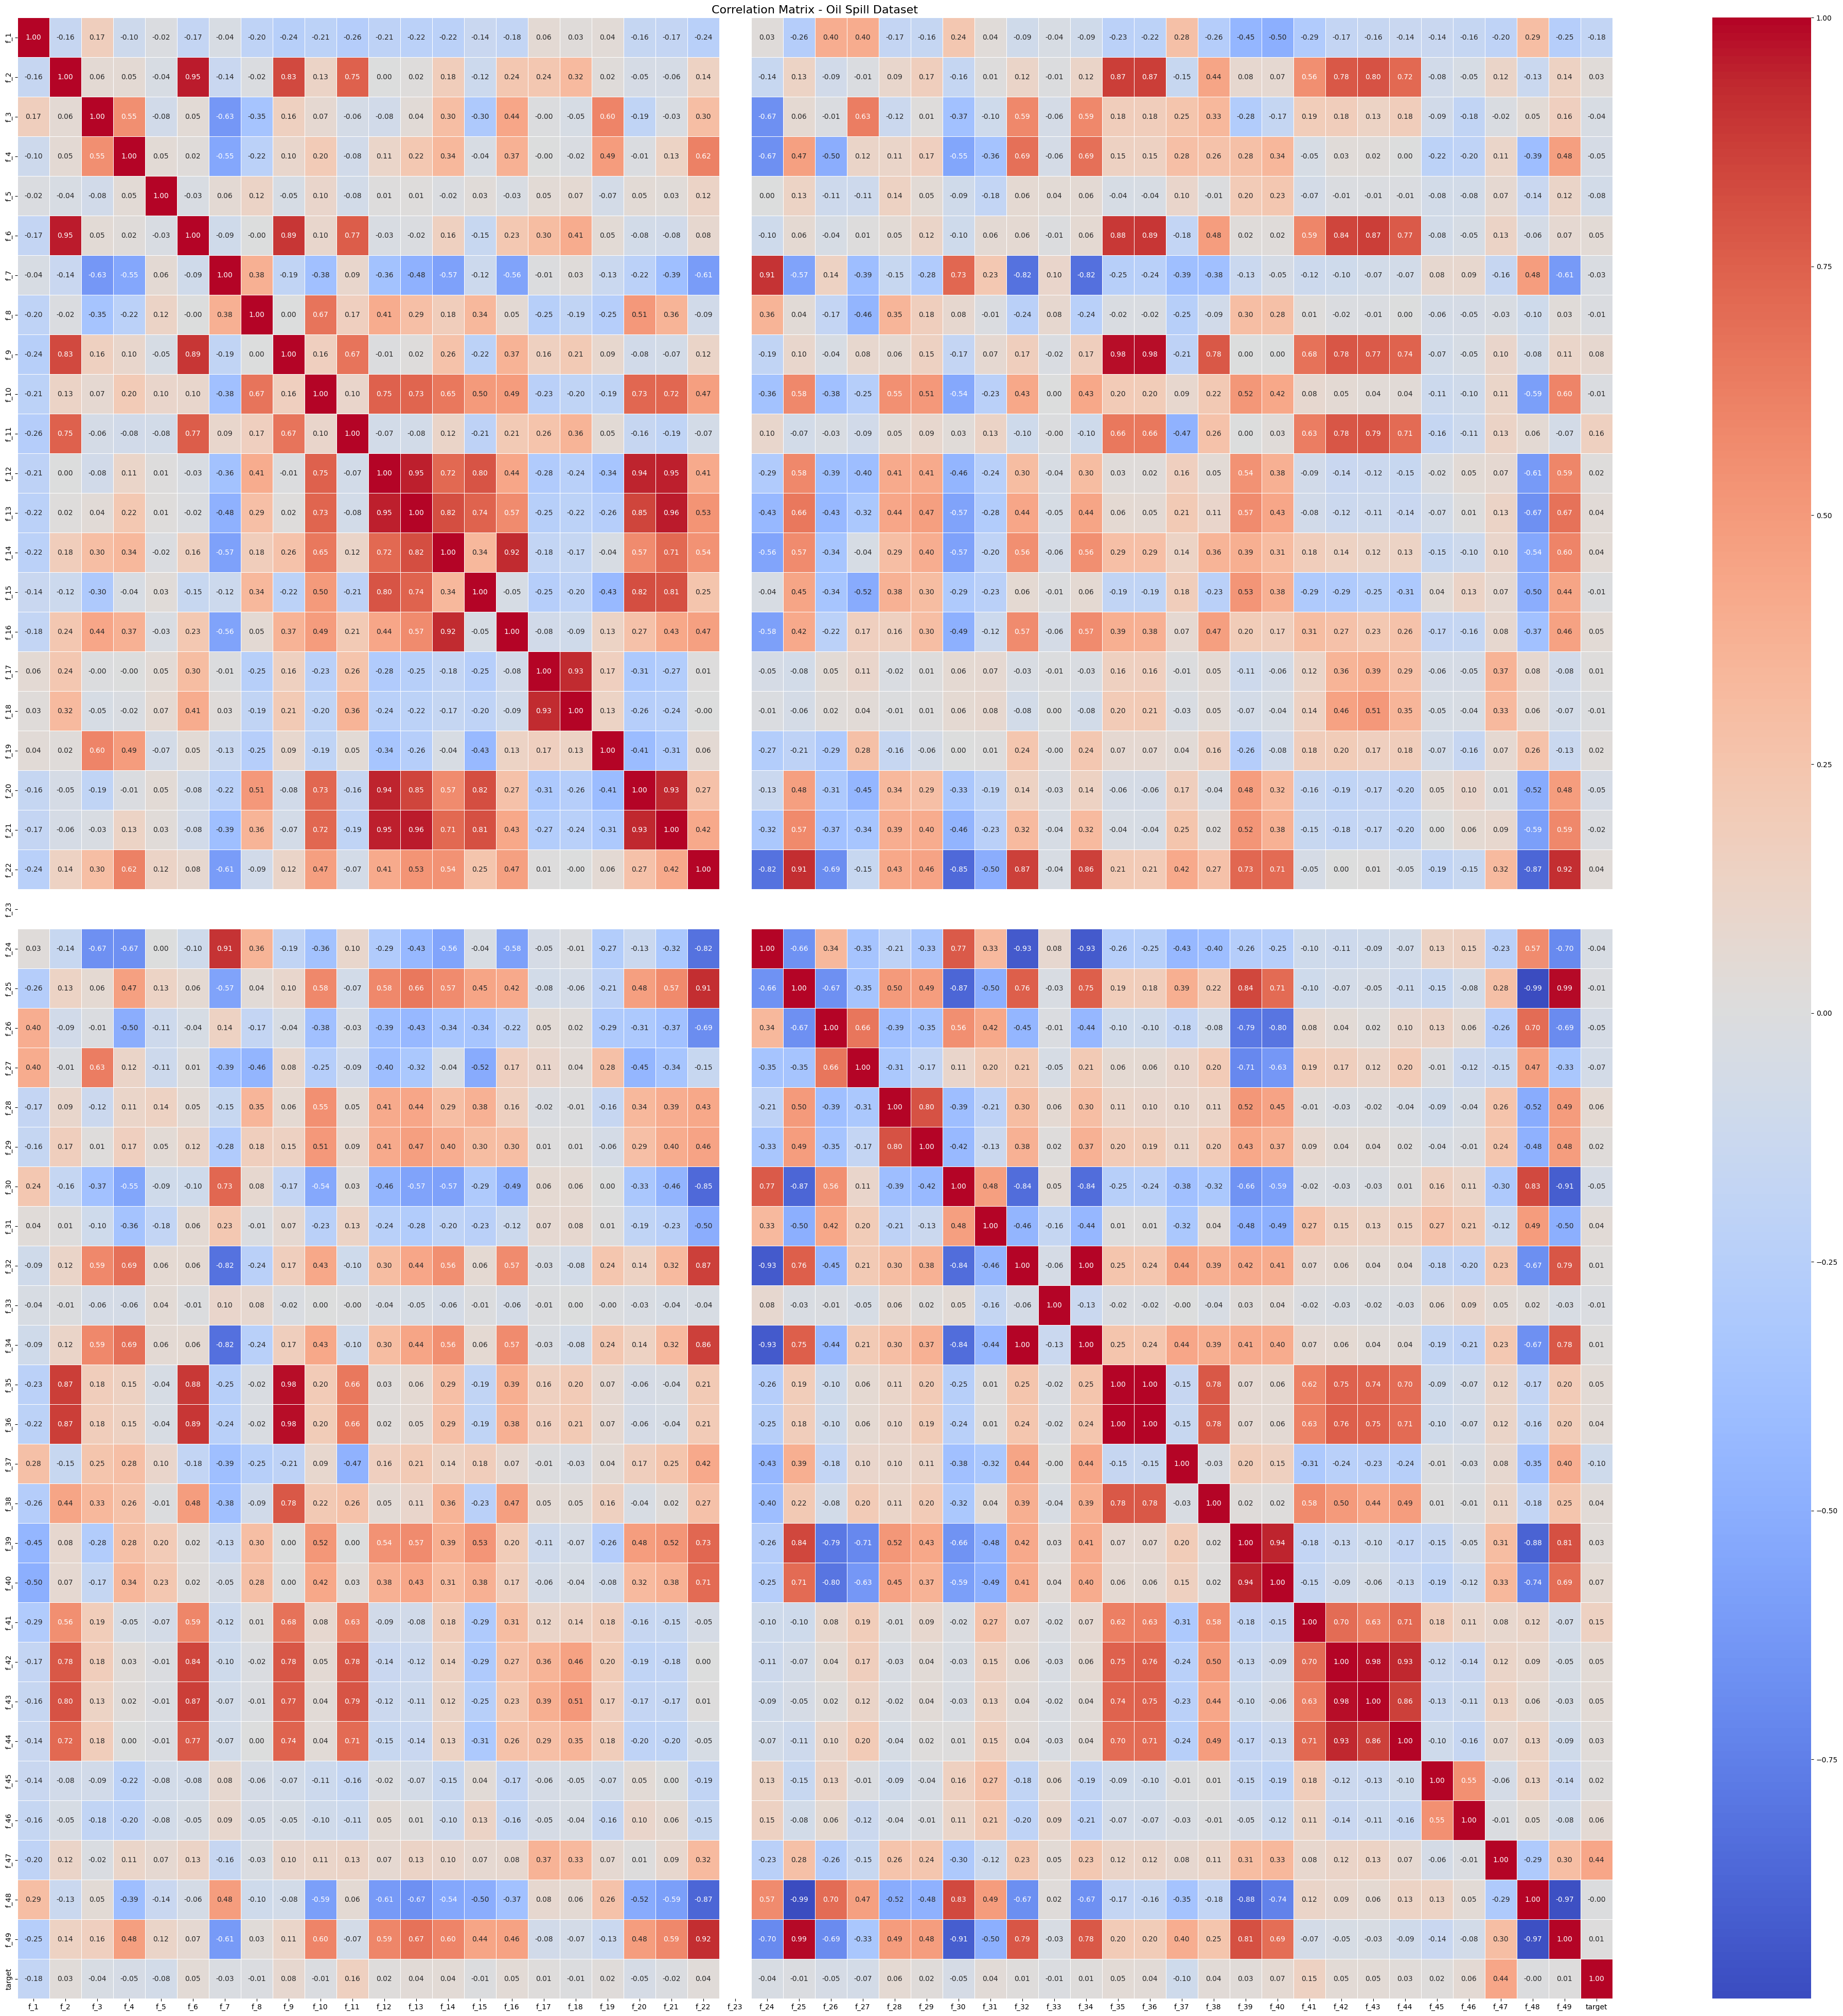

In [ ]:
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Oil Spill Dataset", fontsize=16)
plt.show()

**Insights:**

1. From above Correlation and graphs it is clear that F_23 contains a single value and it will not have major impact on model so we will consider dropping it.
2. From the correlation & heatmap we can see few highly correlated values/columns in our dataset, we need to treat them to overcome below problems:

>**Multicollinearity:** Highly correlated features can lead to multicollinearity, which can make it difficult for models to accurately estimate the individual effects of each feature.This can result in:
> - Increased variance in model coefficients, making them less reliable.
>
> - Reduced model interpretability, as it's unclear which features are truly driving predictions.

> **Overfitting:** Highly correlated variables can lead to overfitting in some models, especially if the dataset is not large enough.

>  **Model Stability:** Unnecessary redundancy in features may lead to less stable model performance.

Removing Highly Correlated Columns

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Selecting upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features/columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print(f"Columns with high correlation values : \n{to_drop} \n\nTotal Correlated columns : {len(to_drop)}")

Columns with high correlation values : 
['f_6', 'f_13', 'f_16', 'f_18', 'f_20', 'f_21', 'f_24', 'f_25', 'f_34', 'f_35', 'f_36', 'f_40', 'f_43', 'f_44', 'f_49'] 

Total Correlated columns : 15


In [ ]:
# Drop features/columns
df1 = df.copy()
df1.drop(to_drop, axis=1, inplace=True)
# dropping F_23 since it only has single value
f23 = "f_23"
df1.drop(f23, axis=1, inplace=True)
cleaned_df = df1.copy()
print("Original Dataframe:", df.shape)
print("Cleaned Dataframe (Highly correlated columns removed):", cleaned_df.shape)
print("\nRemoved Columns from dataset:\n", to_drop + [f23])

Original Dataframe: (937, 50)
Cleaned Dataframe (Highly correlated columns removed): (937, 34)

Removed Columns from dataset:
 ['f_6', 'f_13', 'f_16', 'f_18', 'f_20', 'f_21', 'f_24', 'f_25', 'f_34', 'f_35', 'f_36', 'f_40', 'f_43', 'f_44', 'f_49', 'f_23']


---
### Q4) Apply various Machine Learning techniques to predict the output in the target column, make use of Bagging and Ensemble as required, and find the best model by evaluating the model using Model evaluation techniques.

##### Dependant (y) & Independent (x) Features

1. Dropping dependant feature from dataset

In [ ]:
x = cleaned_df.drop("target", axis=1)
y = cleaned_df["target"]

print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(937, 33)
(937,)


2. Splitting The dataset

In [ ]:
# splitting the dataset into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)
print(f"Split Check Test values : {937 * 0.3} & Train values : {937 * 0.7}")
# rows , columns
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Split Check Test values : 281.09999999999997 & Train values : 655.9
(655, 33)
(282, 33)
(655,)
(282,)


###### 3. Display Splitted data

In [ ]:
X_train, X_test

(     f_1    f_2      f_3      f_4  f_5    f_7    f_8      f_9  f_10   f_11  \
 757   25     18    78.11   456.00   70  48.94   7.79   1588.0  0.16   91.8   
 693   46     18   153.39   464.39   13  70.33  15.87   1228.0  0.23  118.7   
 854  122     14   141.86   446.50   66  51.71   5.44   1064.0  0.10  106.6   
 501    7    603   299.61  1472.03  114  25.01   8.98   7654.0  0.36  110.8   
 664   17    162     7.70   546.00   64  70.65  15.70   5362.0  0.22  244.7   
 ..   ...    ...      ...      ...  ...    ...    ...      ...   ...    ...   
 106   96     73  1391.75   934.48   54  41.23   6.75   2570.0  0.16   71.0   
 270  227     63  1139.70   934.33  138  31.78   7.68   2730.0  0.24   57.7   
 860  128     15    80.87   264.07   61  54.40   7.73   1302.0  0.14   93.3   
 435    3  32389   874.99  1210.98   35  24.62   9.75  62250.0  0.40  731.7   
 102   92    121  1171.12  1388.43   66  40.15   9.26   3440.0  0.23   87.9   
 
      ...  f_33  f_37   f_38  f_39     f_41     f_

In [ ]:
y_train, y_test

(757    0
 693    0
 854    0
 501    0
 664    1
       ..
 106    0
 270    0
 860    0
 435    0
 102    0
 Name: target, Length: 655, dtype: int64,
 321    0
 70     0
 209    0
 656    0
 685    0
       ..
 430    0
 292    0
 412    0
 557    0
 133    0
 Name: target, Length: 282, dtype: int64)

4. Standarizing the dataset

In [ ]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.84347997, -0.12493331,  0.30561268, ..., -0.38616422,
        -0.69720058,  0.41600293],
       [-0.36292832, -0.12189254,  0.75321954, ..., -0.38616422,
        -0.30840223,  0.43029588],
       [-1.02949997,  0.26124516,  0.59847027, ..., -0.38616422,
        -0.34532796,  0.39408706],
       ...,
       [ 1.0477233 , -0.14571195,  0.48666751, ..., -0.38616422,
        -0.77709157,  0.41314433],
       [-0.31642332, -0.14824593,  0.91794678, ..., -0.38616422,
         2.82886418, -2.35873678],
       [ 0.61367665, -0.14165758,  1.50003362, ..., -0.38616422,
        -0.53625066,  0.42839016]])

## Model Selection - Evaluation (testing,scoring) & graph plots

#### 1. Function to evaluate the model on various parameters & store the results

In [ ]:
# Function to evaluate and store results in a dictionary
def calculate_scores(model, X_train, y_train, X_test, y_test):
    train_score = accuracy_score(
        y_train, model.predict(X_train)
    )  # Calculate train score
    test_score = accuracy_score(
        y_test, model.predict(X_test))  # Calculate test score

    return train_score, test_score


def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Mean Squared Error and R-squared Score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Confusion Matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)

    cls_report = classification_report(y_test, y_pred, zero_division=0)

    # Display results in tabular format
    results_table = [
        ["Model", model_name],
        ["Mean Squared Error", mse],
        ["R-squared Score", r2],
        ["Confusion Matrix", f"{cm}"],
        ["True Positive", cm[0, 0]],
        ["False Negative", cm[0, 1]],
        ["False Positive", cm[1, 0]],
        ["True Negative", cm[1, 1]],
        ["Accuracy", acc],
        ["AUC", auc_score],
        ["Train Score", train_score],
        ["Test Score", test_score],
    ]

    print(tabulate(results_table, headers=[
          "Metric", "Value"], tablefmt="heavy_grid"))

    # Display Classification Report
    print("\nClassification Report:\n")
    print(cls_report)

    # Plot Confusion Matrix
    plt.matshow(cm, cmap=plt.cm.Reds)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    # Add annotations to matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha="center",
                     va="center", color="black")
    plt.show()

    # Store results in the dictionary
    return {
        "Model": model_name,
        "Mean Squared Error": mse,
        "R-squared Score": r2,
        "True Positive": cm[0, 0],
        "False Negative": cm[0, 1],
        "False Positive": cm[1, 0],
        "True Negative": cm[1, 1],
        "Accuracy": acc,
        "AUC": auc_score,
        "ROC Curve FPR": fpr,
        "ROC Curve TPR": tpr,
        "AUC Value": auc_value,
        "Confusion Matrix": cm,
        "Train Score": {train_score},
        "Test Score": {test_score},
    }

2. Plot for the graph of roc curve

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange",
             label=f"ROC Curve (AUC = {auc_value:.4f})")
    plt.plot([0, 1], [0, 1], label="TPR=FPR", linestyle="--")
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.grid()
    plt.legend()
    plt.show()

- Model To look into
##### List of models to evaluate (just an example of parameters)
<details>
<summary>Models</summary>
<pre>
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs')),
    ("k-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5, weights='uniform')),
    ("Decision Tree", DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50, learning_rate=1.0)),
    ("Bagging", BaggingClassifier(n_estimators=10, max_samples=1.0, max_features=1.0)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("SVM", SVC(probability=True, C=1.0, kernel='rbf')),
]

</pre>
</details>

##### 3. Store the results of models built (by calling above evaluation code)

In [ ]:
# Placeholder for results
evaluation_results = []

### Different Models Testing,evaulation & result/graph

#### 1. Logistic Regression


 LogisticRegression(max_iter=1000) 

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Logistic Regression  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 0.031914893617021274 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ 0.14860784971486074  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Confusion Matrix   ┃ [[266   5]           ┃
┃                    ┃  [  4   7]]          ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Positive      ┃ 266                  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Negative     ┃ 5                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Positive     ┃ 4                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Negative      ┃ 7                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Accuracy           ┃ 0.9680851063829787 

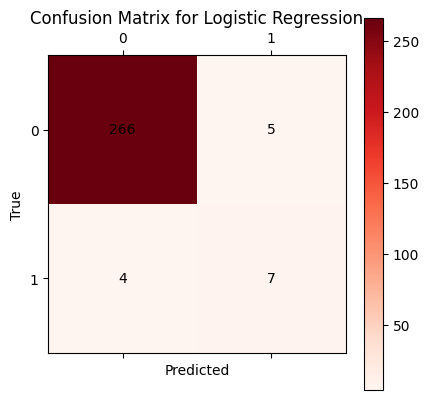

***************************************************************************


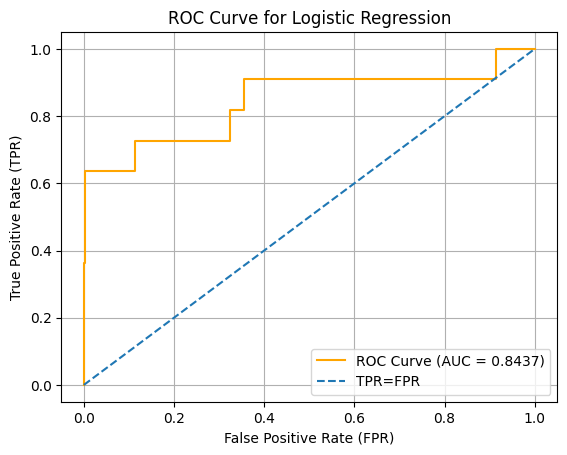

---------------------------------------------------------------------------


LogisticRegression(max_iter=1000)

In [ ]:
# 1. Passing the model name
model_name = "Logistic Regression"

# 2. model parameters
model = LogisticRegression(max_iter=1000, C=1.0, solver="lbfgs")

# 3.1: Fit the Model
model.fit(X_train, y_train)
print("\n", model, "\n")

# 3.2: Score Calculation
train_score, test_score = calculate_scores(
    model, X_train, y_train, X_test, y_test)

# 3.3: Evaluate and Store Results
results = evaluate_model(model, model_name, X_test, y_test)
evaluation_results.append(results)

# Section 3.3: Plot ROC curve
print("*" * 75)
plot_roc_curve(model, X_test, y_test)
print("-" * 75)

# Model Detail
model

#### 2. KNeighbors Classifier


 KNeighborsClassifier() 

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ k-Nearest Neighbors  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 0.04609929078014184  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ -0.22978866152297894 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Confusion Matrix   ┃ [[264   7]           ┃
┃                    ┃  [  6   5]]          ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Positive      ┃ 264                  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Negative     ┃ 7                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Positive     ┃ 6                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Negative      ┃ 5                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Accuracy           ┃ 0.9539007092198581   ┃
┣━━━━━━

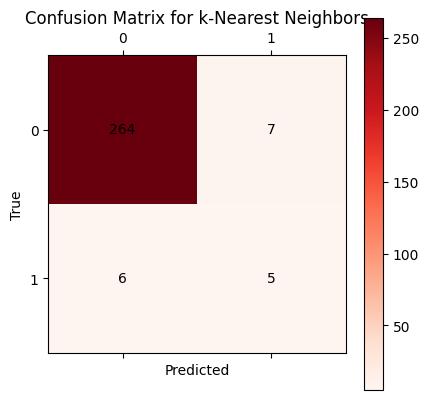

***************************************************************************


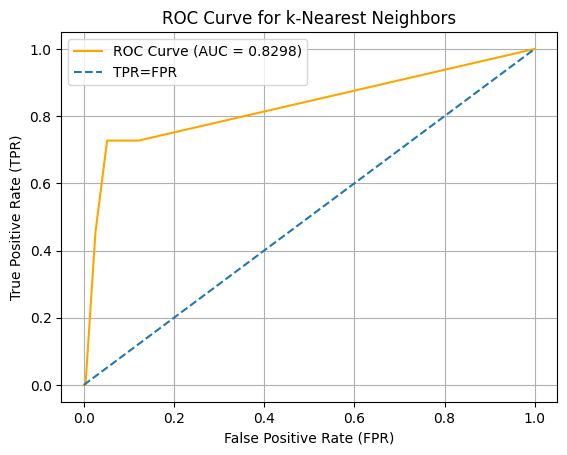

---------------------------------------------------------------------------


KNeighborsClassifier()

In [ ]:
# 1. Passing the model name
model_name = "k-Nearest Neighbors"

# 2. model parameters
model = KNeighborsClassifier(n_neighbors=5, weights="uniform")

# 3.1: Fit the Model
model.fit(X_train, y_train)
print("\n", model, "\n")

# 3.2: Score Calculation
train_score, test_score = calculate_scores(
    model, X_train, y_train, X_test, y_test)

# 3.3: Evaluate and Store Results
results = evaluate_model(model, model_name, X_test, y_test)
evaluation_results.append(results)

# Section 3.3: Plot ROC curve
print("*" * 75)
plot_roc_curve(model, X_test, y_test)
print("-" * 75)

# Model Detail
model

#### 3. Decision Tree Classifier


 DecisionTreeClassifier() 

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Decision Tree        ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 0.04609929078014184  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ -0.22978866152297894 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Confusion Matrix   ┃ [[264   7]           ┃
┃                    ┃  [  6   5]]          ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Positive      ┃ 264                  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Negative     ┃ 7                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Positive     ┃ 6                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Negative      ┃ 5                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Accuracy           ┃ 0.9539007092198581   ┃
┣━━━━

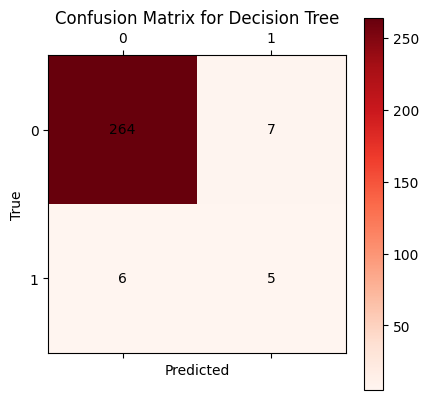

***************************************************************************


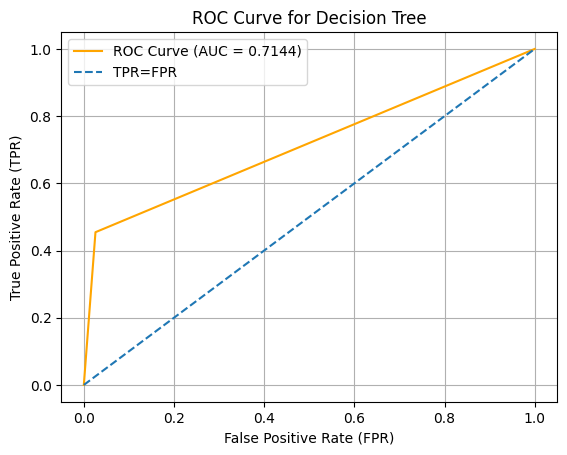

---------------------------------------------------------------------------


DecisionTreeClassifier()

In [ ]:
# 1. Passing the model name
model_name = "Decision Tree"

# 2. model parameters
model = DecisionTreeClassifier(
    max_depth=None, min_samples_split=2, min_samples_leaf=1)
# 3.1: Fit the Model
model.fit(X_train, y_train)
print("\n", model, "\n")

# 3.2: Score Calculation
train_score, test_score = calculate_scores(
    model, X_train, y_train, X_test, y_test)

# 3.3: Evaluate and Store Results
results = evaluate_model(model, model_name, X_test, y_test)
evaluation_results.append(results)

# Section 3.3: Plot ROC curve
print("*" * 75)
plot_roc_curve(model, X_test, y_test)
print("-" * 75)

# Model Detail
model

#### 4. Random Forest Classifier


 RandomForestClassifier() 

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Random Forest        ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 0.031914893617021274 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ 0.14860784971486074  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Confusion Matrix   ┃ [[270   1]           ┃
┃                    ┃  [  8   3]]          ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Positive      ┃ 270                  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Negative     ┃ 1                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Positive     ┃ 8                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Negative      ┃ 3                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Accuracy           ┃ 0.9680851063829787   ┃
┣━━━━

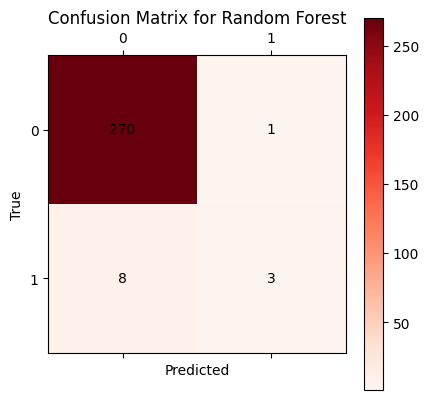

***************************************************************************


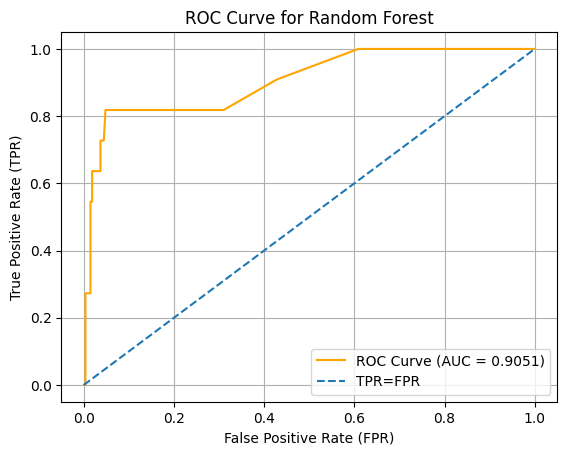

---------------------------------------------------------------------------


RandomForestClassifier()

In [ ]:
# 1. Passing the model name
model_name = "Random Forest"

# 2. model parameters
model = RandomForestClassifier(
    n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1
)

# 3.1: Fit the Model
model.fit(X_train, y_train)
print("\n", model, "\n")

# 3.2: Score Calculation
train_score, test_score = calculate_scores(
    model, X_train, y_train, X_test, y_test)

# 3.3: Evaluate and Store Results
results = evaluate_model(model, model_name, X_test, y_test)
evaluation_results.append(results)

# Section 3.3: Plot ROC curve
print("*" * 75)
plot_roc_curve(model, X_test, y_test)
print("-" * 75)

# Model Detail
model

#### 5. Ada Boost Classifier


 AdaBoostClassifier() 

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ AdaBoost             ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 0.03546099290780142  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ 0.054008721905400736 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Confusion Matrix   ┃ [[268   3]           ┃
┃                    ┃  [  7   4]]          ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Positive      ┃ 268                  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Negative     ┃ 3                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Positive     ┃ 7                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Negative      ┃ 4                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Accuracy           ┃ 0.9645390070921985   ┃
┣━━━━━━━━

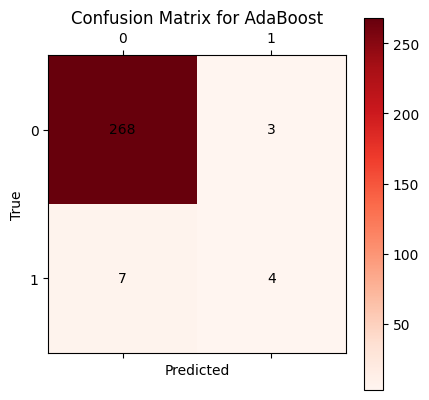

***************************************************************************


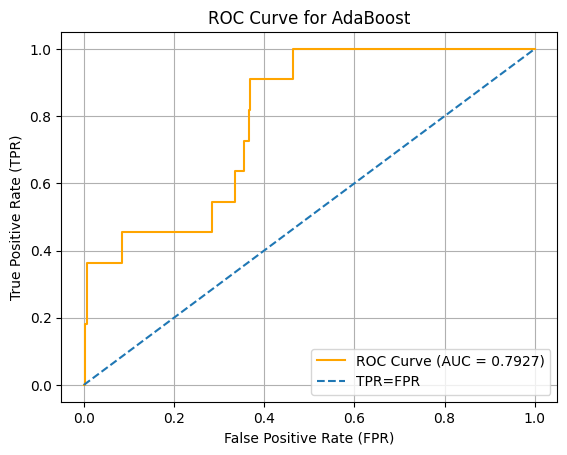

---------------------------------------------------------------------------


AdaBoostClassifier()

In [ ]:
# 1. Passing the model name
model_name = "AdaBoost"

# 2. model parameters
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

# 3.1: Fit the Model
model.fit(X_train, y_train)
print("\n", model, "\n")

# 3.2: Score Calculation
train_score, test_score = calculate_scores(
    model, X_train, y_train, X_test, y_test)

# 3.3: Evaluate and Store Results
results = evaluate_model(model, model_name, X_test, y_test)
evaluation_results.append(results)

# Section 3.3: Plot ROC curve
print("*" * 75)
plot_roc_curve(model, X_test, y_test)
print("-" * 75)

# Model Detail
model

#### 6. Bagging Classifier


 BaggingClassifier() 

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Bagging              ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 0.04609929078014184  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ -0.22978866152297894 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Confusion Matrix   ┃ [[267   4]           ┃
┃                    ┃  [  9   2]]          ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Positive      ┃ 267                  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Negative     ┃ 4                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Positive     ┃ 9                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Negative      ┃ 2                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Accuracy           ┃ 0.9539007092198581   ┃
┣━━━━━━━━━

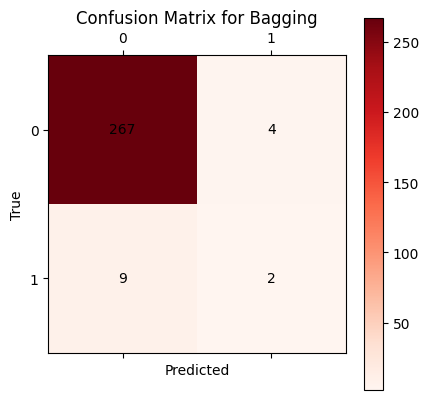

***************************************************************************


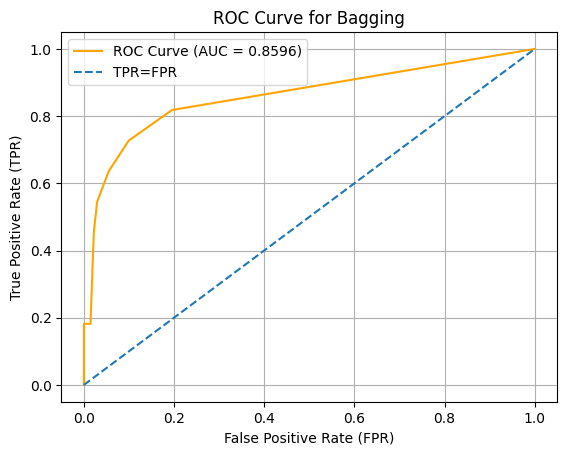

---------------------------------------------------------------------------


BaggingClassifier()

In [ ]:
# 1. Passing the model name
model_name = "Bagging"

# 2. model parameters
model = BaggingClassifier(n_estimators=10, max_samples=1.0, max_features=1.0)

# 3.1: Fit the Model
model.fit(X_train, y_train)
print("\n", model, "\n")

# 3.2: Score Calculation
train_score, test_score = calculate_scores(
    model, X_train, y_train, X_test, y_test)

# 3.3: Evaluate and Store Results
results = evaluate_model(model, model_name, X_test, y_test)
evaluation_results.append(results)

# Section 3.3: Plot ROC curve
print("*" * 75)
plot_roc_curve(model, X_test, y_test)
print("-" * 75)

# Model Detail
model

#### 7. Gradient Boosting Classifier


 GradientBoostingClassifier() 

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Gradient Boosting    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 0.031914893617021274 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ 0.14860784971486074  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Confusion Matrix   ┃ [[268   3]           ┃
┃                    ┃  [  6   5]]          ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Positive      ┃ 268                  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Negative     ┃ 3                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Positive     ┃ 6                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Negative      ┃ 5                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Accuracy           ┃ 0.9680851063829787   ┃
┣

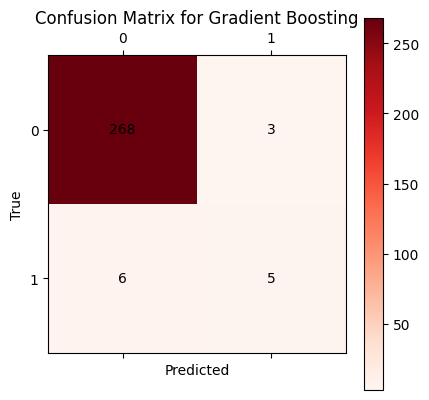

***************************************************************************


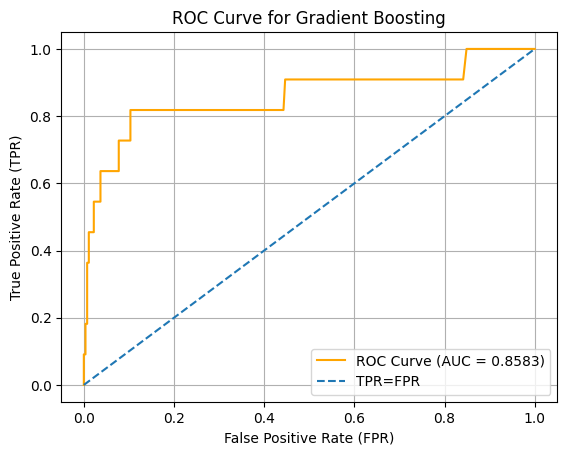

---------------------------------------------------------------------------


GradientBoostingClassifier()

In [ ]:
# 1. Passing the model name
model_name = "Gradient Boosting"

# 2. model parameters
model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3)

# 3.1: Fit the Model
model.fit(X_train, y_train)
print("\n", model, "\n")

# 3.2: Score Calculation
train_score, test_score = calculate_scores(
    model, X_train, y_train, X_test, y_test)

# 3.3: Evaluate and Store Results
results = evaluate_model(model, model_name, X_test, y_test)
evaluation_results.append(results)

# Section 3.3: Plot ROC curve
print("*" * 75)
plot_roc_curve(model, X_test, y_test)
print("-" * 75)

# Model Detail
model

#### 8. Gaussian Naive Bayes


 GaussianNB() 

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Gaussian Naive Bayes ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 0.0851063829787234   ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ -1.2703790674270383  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Confusion Matrix   ┃ [[251  20]           ┃
┃                    ┃  [  4   7]]          ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Positive      ┃ 251                  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Negative     ┃ 20                   ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Positive     ┃ 4                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Negative      ┃ 7                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Accuracy           ┃ 0.9148936170212766   ┃
┣━━━━━━━━━━━━━━━━

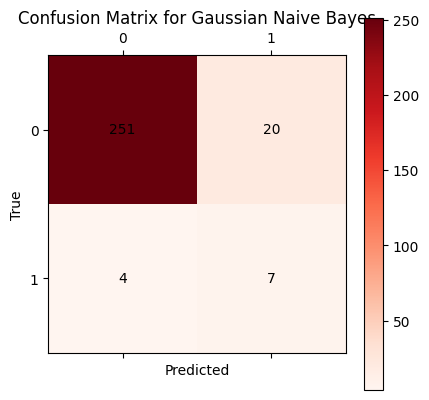

***************************************************************************


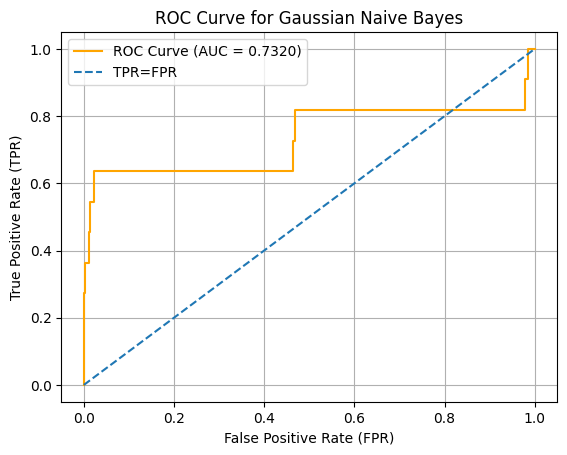

---------------------------------------------------------------------------


GaussianNB()

In [ ]:
# 1. Passing the model name
model_name = "Gaussian Naive Bayes"

# 2. model parameters
model = GaussianNB()

# 3.1: Fit the Model
model.fit(X_train, y_train)
print("\n", model, "\n")

# 3.2: Score Calculation
train_score, test_score = calculate_scores(
    model, X_train, y_train, X_test, y_test)

# 3.3: Evaluate and Store Results
results = evaluate_model(model, model_name, X_test, y_test)
evaluation_results.append(results)

# Section 3.3: Plot ROC curve
print("*" * 75)
plot_roc_curve(model, X_test, y_test)
print("-" * 75)

# Model Detail
model

#### 9. SVM


 SVC(probability=True) 

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Support Vector Machine ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 0.03900709219858156    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ -0.04059040590405916   ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Confusion Matrix   ┃ [[271   0]             ┃
┃                    ┃  [ 11   0]]            ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Positive      ┃ 271                    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Negative     ┃ 0                      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ False Positive     ┃ 11                     ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ True Negative      ┃ 0                      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Accuracy    

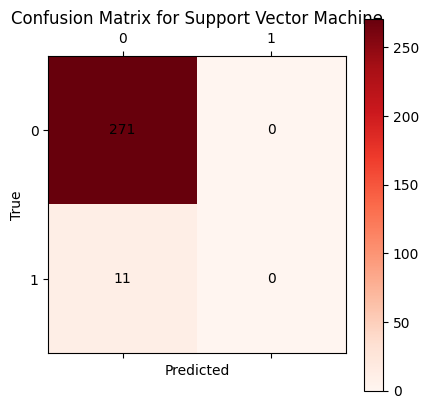

***************************************************************************


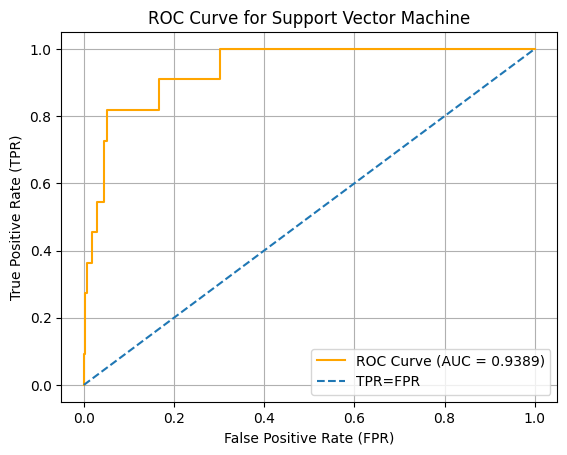

---------------------------------------------------------------------------


SVC(probability=True)

In [ ]:
# 1. Passing the model name
model_name = "Support Vector Machine"

# 2. model parameters
model = SVC(probability=True, C=1.0, kernel="rbf")

# 3.1: Fit the Model
model.fit(X_train, y_train)
print("\n", model, "\n")

# 3.2: Score Calculation
train_score, test_score = calculate_scores(
    model, X_train, y_train, X_test, y_test)

# 3.3: Evaluate and Store Results
results = evaluate_model(model, model_name, X_test, y_test)
evaluation_results.append(results)

# Section 3.3: Plot ROC curve
print("*" * 75)
plot_roc_curve(model, X_test, y_test)
print("-" * 75)

# Model Detail
model

### Results Check

In [ ]:
print(f"\nTotal models used & Evaluated : {len(evaluation_results)} & \nSaved parameters in each results :{len(results)}")
for result in evaluation_results:
    print("\n", result)


Total models used & Evaluated : 9 & 
Saved parameters in each results :15

 {'Model': 'Logistic Regression', 'Mean Squared Error': 0.031914893617021274, 'R-squared Score': 0.14860784971486074, 'True Positive': 266, 'False Negative': 5, 'False Positive': 4, 'True Negative': 7, 'Accuracy': 0.9680851063829787, 'AUC': 0.8436766185843676, 'ROC Curve FPR': array([0.        , 0.        , 0.        , 0.00369004, 0.00369004,
       0.11439114, 0.11439114, 0.32472325, 0.32472325, 0.35424354,
       0.35424354, 0.91512915, 0.91512915, 1.        ]), 'ROC Curve TPR': array([0.        , 0.09090909, 0.36363636, 0.36363636, 0.63636364,
       0.63636364, 0.72727273, 0.72727273, 0.81818182, 0.81818182,
       0.90909091, 0.90909091, 1.        , 1.        ]), 'AUC Value': 0.8436766185843676, 'Confusion Matrix': array([[266,   5],
       [  4,   7]]), 'Train Score': {0.9679389312977099}, 'Test Score': {0.9680851063829787}}

 {'Model': 'k-Nearest Neighbors', 'Mean Squared Error': 0.04609929078014184, 'R-

### 4. Model Comparison and Selection

#### Model performance table (Basic)

In [ ]:
model_performance = pd.DataFrame(evaluation_results)
model_performance

,Model,Mean Squared Error,R-squared Score,True Positive,False Negative,False Positive,True Negative,Accuracy,AUC,ROC Curve FPR,ROC Curve TPR,AUC Value,Confusion Matrix,Train Score,Test Score
0,Logistic Regression,0.031915,0.148608,266,5,4,7,0.968085,0.843677,"[0.0, 0.0, 0.0, 0.0036900369003690036, 0.00369...","[0.0, 0.09090909090909091, 0.36363636363636365...",0.843677,"[[266, 5], [4, 7]]",{0.9679389312977099},{0.9680851063829787}
1,k-Nearest Neighbors,0.046099,-0.229789,264,7,6,5,0.953901,0.829755,"[0.0, 0.0036900369003690036, 0.025830258302583...","[0.0, 0.0, 0.45454545454545453, 0.727272727272...",0.829755,"[[264, 7], [6, 5]]",{0.9526717557251908},{0.9539007092198581}
2,Decision Tree,0.046099,-0.229789,264,7,6,5,0.953901,0.714358,"[0.0, 0.025830258302583026, 1.0]","[0.0, 0.45454545454545453, 1.0]",0.714358,"[[264, 7], [6, 5]]",{1.0},{0.9539007092198581}
3,Random Forest,0.031915,0.148608,270,1,8,3,0.968085,0.905065,"[0.0, 0.0036900369003690036, 0.003690036900369...","[0.0, 0.0, 0.2727272727272727, 0.2727272727272...",0.905065,"[[270, 1], [8, 3]]",{1.0},{0.9680851063829787}
4,AdaBoost,0.035461,0.054009,268,3,7,4,0.964539,0.792687,"[0.0, 0.0036900369003690036, 0.003690036900369...","[0.0, 0.0, 0.18181818181818182, 0.181818181818...",0.792687,"[[268, 3], [7, 4]]",{1.0},{0.9645390070921985}
5,Bagging,0.046099,-0.229789,267,4,9,2,0.953901,0.859611,"[0.0, 0.0, 0.0, 0.014760147601476014, 0.022140...","[0.0, 0.09090909090909091, 0.18181818181818182...",0.859611,"[[267, 4], [9, 2]]",{0.9969465648854962},{0.9539007092198581}
6,Gradient Boosting,0.031915,0.148608,268,3,6,5,0.968085,0.858269,"[0.0, 0.0, 0.0036900369003690036, 0.0036900369...","[0.0, 0.09090909090909091, 0.09090909090909091...",0.858269,"[[268, 3], [6, 5]]",{1.0},{0.9680851063829787}
7,Gaussian Naive Bayes,0.085106,-1.270379,251,20,4,7,0.914894,0.731969,"[0.0, 0.0, 0.0, 0.0036900369003690036, 0.00369...","[0.0, 0.09090909090909091, 0.2727272727272727,...",0.731969,"[[251, 20], [4, 7]]",{0.9267175572519084},{0.9148936170212766}
8,Support Vector Machine,0.039007,-0.040590,271,0,11,0,0.960993,0.938947,"[0.0, 0.0, 0.0036900369003690036, 0.0036900369...","[0.0, 0.09090909090909091, 0.09090909090909091...",0.938947,"[[271, 0], [11, 0]]",{0.9603053435114504},{0.9609929078014184}


#### Model Comparision & Best fit selection

In [ ]:
# Change the below metrics as needed say we only want to get the model on accuracy but then change the sorting parameter accordingly
selected_metrics_for_comparison = [
    "Mean Squared Error",
    "R-squared Score",
    "Accuracy",
    "AUC",
    "Precision",
    "Recall",
    "F1-score",
    "True Positive",
    "True Negative",
    "False Positive",
    "False Negative",
]
# Create a DataFrame to compare the models
df_results = pd.DataFrame(evaluation_results)

# Calculate additional metrics: Precision, Recall, F1-score, True Positive, True Negative, False Positive, False Negative
df_results["Precision"] = df_results["True Positive"] / \
    (df_results["True Positive"] + df_results["False Positive"])

df_results["Recall"] = df_results["True Positive"] / \
    (df_results["True Positive"] + df_results["False Negative"])

df_results["F1-score"] = 2 * (df_results["Precision"] * df_results["Recall"]) / \
    (df_results["Precision"] + df_results["Recall"])

# Sort the DataFrame based on the chosen metrics (lower is better for MSE, higher for others)
df_results_sorted = df_results.sort_values(
    by=selected_metrics_for_comparison, ascending=[ True, False, False, False, False, False, False, False, True, True, False])

# Display the comparison table
print("\nModel Comparison:")
print(tabulate(df_results_sorted[["Model"]+selected_metrics_for_comparison + ["Train Score", "Test Score"]], headers="keys", tablefmt="heavy_grid"))
# Select the best model based on the chosen metrics
best_models = {}
best_models_table = []  # Table to store the best models in tabular format

for metric in selected_metrics_for_comparison:
    best_model_idx = df_results_sorted[metric].idxmin(
    ) if "Error" in metric else df_results_sorted[metric].idxmax()
    best_models[metric] = df_results_sorted.loc[best_model_idx, "Model"]
    best_model_name = best_models[metric]
    best_model_value = df_results_sorted.loc[best_model_idx, metric]
    best_models_table.append([f"Best in ({metric})", best_model_name, best_model_value])

# Display the best models in tabular format
print("\nBest Models:")
print(tabulate(best_models_table, headers=["Metric", "Model Name", "Value"], tablefmt="heavy_grid"))

# Overall Best Model based on a consensus of multiple metrics
consensus_metrics = set(selected_metrics_for_comparison)
overall_best_model_idx = df_results_sorted[selected_metrics_for_comparison].mean(axis=1).idxmax()
overall_best_model = df_results_sorted.loc[overall_best_model_idx, "Model"]
print(f"\nOverall Best Model based on {', '.join(consensus_metrics)}: '{overall_best_model}'")


Model Comparison:
┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃    ┃ Model                  ┃   Mean Squared Error ┃   R-squared Score ┃   Accuracy ┃      AUC ┃   Precision ┃   Recall ┃   F1-score ┃   True Positive ┃   True Negative ┃   False Positive ┃   False Negative ┃ Train Score          ┃ Test Score           ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃  3 ┃ Random Forest          ┃            0.0319149 ┃         0.148608  ┃   0.968085 ┃ 0.905065 ┃    0.971223 ┃ 0.99631  ┃   0.983607 ┃             270 ┃               3 ┃                8 ┃                1 ┃

#### Code to automate the best model config by using the name from above calculation and below model dictionary

In [ ]:
# Models to evaulate the name and relevant parameter to take for best fit model fitting
models_dict = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs'),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    "Bagging": BaggingClassifier(n_estimators=10, max_samples=1.0, max_features=1.0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Gaussian Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, C=1.0, kernel='rbf')
}

# Retrieve the value using the key
retrieved_value = models_dict.get(overall_best_model)

if retrieved_value is not None:
    selected_model_name = overall_best_model
    selected_model = retrieved_value
    # selected_model_params = retrieved_value.get_params()
    print(f"Best Model Name: {selected_model_name}")
    print(f"\nRetrieved Model Instance: {selected_model}")

Best Model Name: Random Forest

Retrieved Model Instance: RandomForestClassifier()


#### Best Model Selection & saving as final model

In [ ]:
# Manually coding the best model name and changing the below parameter
# f_modelname = "Logistic Regression"
# final_model = LogisticRegression(max_iter=10000, C=1.0, solver="lbfgs")
# final_model.fit(x, y)

In [ ]:
# Automating the above hardcoded values by using the above dictonary and for loop
f_modelname = selected_model_name
f_model = selected_model
print(f"Best Selected Model name : '{f_modelname}' & \nits parameters :\n{f_model.get_params()}")
final_model = f_model
final_model.fit(x, y)

Best Selected Model name : 'Random Forest' & 
its parameters :
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


RandomForestClassifier()

### Q5) Save the best model and Load the model


#### Saving Model as pickle file and dumping it to use later on

In [ ]:
# wb - write binary file
pickle.dump(final_model, open(f"{f_modelname}.pkl", "wb"))

#### Loading the saved model

In [ ]:
load_model = pickle.load(open(f"{f_modelname}.pkl", "rb"))  # rb = read binary
print(f"Name of loaded Model : {f_modelname}")
load_model

Name of loaded Model : Random Forest


RandomForestClassifier()

In [ ]:
# Testing the imported model
print("Length of test data: ", len(load_model.predict(X_test)))
load_model.predict(X_test)

Length of test data:  282


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Q6) Take the original data set and make another dataset by randomly picking 20 data points from the oil spill dataset and applying the saved model to the same.

#### Generating sample data from cleaned df to test on the trained model.

In [ ]:
random_datasample = cleaned_df.sample(20)
random_datasample_df = random_datasample.drop("target", axis=1)
print(random_datasample_df.shape)
random_datasample_df.head()

(20, 33)


,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_9,f_10,f_11,...,f_33,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48
855,123,12,116.33,377.75,59,52.42,4.44,1011.0,0.09,96.1,...,0.0,0.01,10.52,82,524.79,127.28,20.62,0,2475.04,65.88
148,139,56,1646.05,1534.18,55,31.73,5.42,1840.0,0.17,76.1,...,0.0,0.01,24.18,78,721.11,223.61,6.12,0,3352.35,66.31
728,81,10,47.20,651.80,37,71.50,8.11,704.0,0.11,115.1,...,0.0,0.01,6.12,102,402.49,0.00,0.00,1,4515.09,66.21
902,170,14,26.50,642.79,58,46.79,9.16,1048.0,0.20,108.2,...,0.0,0.00,9.69,82,402.49,127.28,4.22,0,4548.47,66.19
434,2,6099,673.25,1730.74,13,25.60,8.10,61516.5,0.32,139.4,...,0.0,0.01,441.23,133,0.00,0.00,0.00,0,13101.35,36.49


#### Resetting the index as the randomly generated data has no continuos index (wil delete later,just for understanding)

In [ ]:
random_datasample_df.reset_index()

,index,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_9,f_10,...,f_33,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48
0,855,123,12,116.33,377.75,59,52.42,4.44,1011.0,0.09,...,0.0,0.01,10.52,82,524.79,127.28,20.62,0,2475.04,65.88
1,148,139,56,1646.05,1534.18,55,31.73,5.42,1840.0,0.17,...,0.0,0.01,24.18,78,721.11,223.61,6.12,0,3352.35,66.31
2,728,81,10,47.20,651.80,37,71.50,8.11,704.0,0.11,...,0.0,0.01,6.12,102,402.49,0.00,0.00,1,4515.09,66.21
3,902,170,14,26.50,642.79,58,46.79,9.16,1048.0,0.20,...,0.0,0.00,9.69,82,402.49,127.28,4.22,0,4548.47,66.19
4,434,2,6099,673.25,1730.74,13,25.60,8.10,61516.5,0.32,...,0.0,0.01,441.23,133,0.00,0.00,0.00,0,13101.35,36.49
5,473,41,134,1260.22,1237.23,70,27.52,11.30,3374.5,0.41,...,0.0,0.02,60.43,133,877.85,391.51,4.42,0,8095.91,36.86
6,409,146,111,827.05,1260.37,118,40.58,6.66,2980.0,0.16,...,0.0,0.01,32.00,85,894.43,471.70,3.94,0,6277.01,66.03
7,96,86,86,769.73,1761.26,55,37.55,6.27,3090.0,0.17,...,0.0,0.01,44.41,78,1400.89,180.28,14.93,1,15720.91,66.30
8,235,103,214,1186.12,969.47,145,31.31,6.94,6440.0,0.22,...,0.0,0.01,77.52,64,1081.67,970.82,1.76,0,5037.66,65.94
9,362,82,71,104.75,1357.72,96,42.37,4.83,1710.0,0.11,...,0.0,0.01,16.47,85,608.28,300.00,2.70,0,32773.88,65.97


#### Saving the random sample dataset and removing the index

In [ ]:
random_datasample_df.to_csv("20_random_sample.csv", index=False)

#### Loading the sample data and checking basics

In [ ]:
testsample_df = pd.read_csv("20_random_sample.csv")
print(
    "Shape of loaded sample dataframe:",
    testsample_df.shape,
    "\n\nSample Dataframe contents",
)
testsample_df

Shape of loaded sample dataframe: (20, 33) 

Sample Dataframe contents


,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_9,f_10,f_11,...,f_33,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48
0,123,12,116.33,377.75,59,52.42,4.44,1011.0,0.09,96.1,...,0.0,0.01,10.52,82,524.79,127.28,20.62,0,2475.04,65.88
1,139,56,1646.05,1534.18,55,31.73,5.42,1840.0,0.17,76.1,...,0.0,0.01,24.18,78,721.11,223.61,6.12,0,3352.35,66.31
2,81,10,47.20,651.80,37,71.50,8.11,704.0,0.11,115.1,...,0.0,0.01,6.12,102,402.49,0.00,0.00,1,4515.09,66.21
3,170,14,26.50,642.79,58,46.79,9.16,1048.0,0.20,108.2,...,0.0,0.00,9.69,82,402.49,127.28,4.22,0,4548.47,66.19
4,2,6099,673.25,1730.74,13,25.60,8.10,61516.5,0.32,139.4,...,0.0,0.01,441.23,133,0.00,0.00,0.00,0,13101.35,36.49
5,41,134,1260.22,1237.23,70,27.52,11.30,3374.5,0.41,55.8,...,0.0,0.02,60.43,133,877.85,391.51,4.42,0,8095.91,36.86
6,146,111,827.05,1260.37,118,40.58,6.66,2980.0,0.16,93.1,...,0.0,0.01,32.00,85,894.43,471.70,3.94,0,6277.01,66.03
7,86,86,769.73,1761.26,55,37.55,6.27,3090.0,0.17,69.6,...,0.0,0.01,44.41,78,1400.89,180.28,14.93,1,15720.91,66.30
8,103,214,1186.12,969.47,145,31.31,6.94,6440.0,0.22,83.1,...,0.0,0.01,77.52,64,1081.67,970.82,1.76,0,5037.66,65.94
9,82,71,104.75,1357.72,96,42.37,4.83,1710.0,0.11,103.8,...,0.0,0.01,16.47,85,608.28,300.00,2.70,0,32773.88,65.97


In [ ]:
# making prediction on random data
predicted_data = load_model.predict(testsample_df)
print(f"The predicted data from {f_modelname} model:\n", predicted_data)

The predicted data from Random Forest model:
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


#### Comparision of Actual and Predicted values by the model

In [ ]:
#  Compare the actual data and predicted data
prediction_data = random_datasample.copy()
prediction_data["predicted_target"] = predicted_data

# Print the actual and predicted data
print(f"Actual Data and Predicted Data Comparision based on {f_modelname} model:\n")
# print(prediction_data[["target", "predicted_target"]])
comparision = {
    "Actual Target": random_datasample["target"], "Predicted Target": predicted_data}
final_results = pd.DataFrame(comparision)
final_results

Actual Data and Predicted Data Comparision based on Random Forest model:



,Actual Target,Predicted Target
855,0,0
148,0,0
728,0,0
902,0,0
434,0,0
473,0,0
409,0,0
96,0,0
235,0,0
362,1,1


#### Calculating the correctness of model

In [ ]:
# Calculate the number of correct predictions
correct_predictions = (
    prediction_data["predicted_target"] == prediction_data["target"]).sum()

# Calculate the percentage of correct predictions
percentage_correct_predictions = (
    correct_predictions / len(prediction_data)) * 100

# Print the result
print(f"\nPercentage of Correct Predictions: {percentage_correct_predictions:.2f}%")
if (percentage_correct_predictions >= 90):
    print(f"\nOur model based on '{f_modelname}' is well trained having prediction accuracy of {percentage_correct_predictions:.2f}%")
else:
    print(f"Our model based on '{f_modelname}' needs to be trained more to achieve atleast 95% prediction accuracy from our current results : {percentage_correct_predictions:.2f}%")


Percentage of Correct Predictions: 100.00%

Our model based on 'Random Forest' is well trained having prediction accuracy of 100.00%


### Saving the results in a output file

In [ ]:
# Saving the final results in a output file

final_results.to_csv('final_results.csv', index=False)
with open('final_results.txt', 'w') as f:
    f.write(final_results.to_string())
with open('final_results.txt', 'a') as f:
    f.write(f"\n\n---------------------------------------\nPrinting the results of our {f_modelname} prediction on random 20 data samples.")
    f.write('\nNumber of correct predictions: {}\n'.format(sum(final_results['Actual Target'] == final_results['Predicted Target'])))
    f.write('Percentage of correct predictions: {}%'.format(100 * sum(final_results['Actual Target'] == final_results['Predicted Target']) / len(final_results)))
    # Print the result in output file
    if (percentage_correct_predictions >= 90):
      f.write(f"\nOur model based on '{f_modelname}' is well trained having prediction accuracy of {percentage_correct_predictions:.2f}%")
    else:
      f.write(f"Our model based on '{f_modelname}' needs to be trained more to achieve atleast 95% prediction accuracy from our current results : {percentage_correct_predictions:.2f}%")
